### PCKF code with only linear terms - To match KF and ENKF with multiple floors

[[0.2]
 [0.3]
 [0.4]]
Forecast PC coefficient matrix is
 [[0.2  0.04 0.01 0.08 0.01 0.03 0.   0.  ]
 [0.3  0.02 0.02 0.02 0.01 0.04 0.   0.  ]
 [0.4  0.03 0.02 0.01 0.02 0.01 0.   0.  ]]
Hk matrix is
 [[1. 0. 0.]
 [0. 1. 0.]]
epsilon is [[ 2.16493494]
 [-0.99065175]]
sample is [0.15271966 0.26295231 0.40532564]
data matrix is
 [[0.8        0.         0.         0.         0.         0.
  0.5        0.        ]
 [0.5        0.         0.         0.         0.         0.
  0.         0.03162278]]
forecast covariance is
 [[0.0164 0.0067 0.0038]
 [0.0067 0.0049 0.0024]
 [0.0038 0.0024 0.0021]]
Noise covariance is
 [[0.25  0.   ]
 [0.    0.001]]
Kalman gain is
 [[0.03397146 1.09701546]
 [0.00438806 0.82552542]
 [0.00415229 0.40206435]]
updated state is
 [[ 0.43978597  0.01670083 -0.01228002  0.05534197 -0.00130987 -0.01489976
   0.01698573  0.03469067]
 [ 0.46773792  0.00331397  0.00344561  0.00313845  0.00170087  0.00684734
   0.00219403  0.02610541]
 [ 0.48290424  0.02179262  0.01191719  

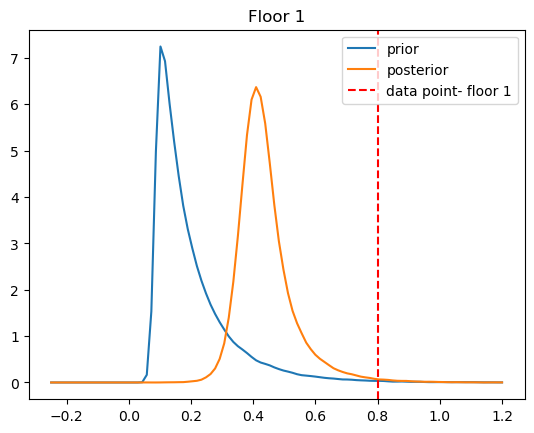

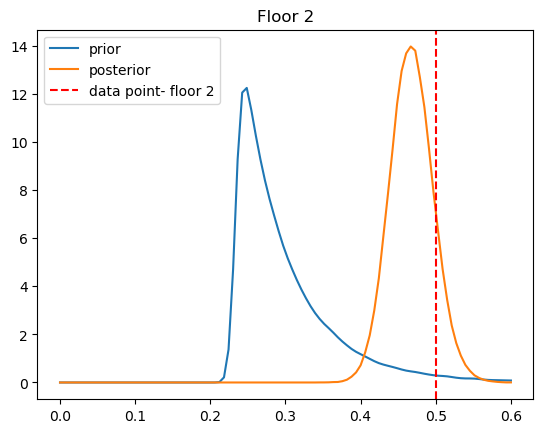

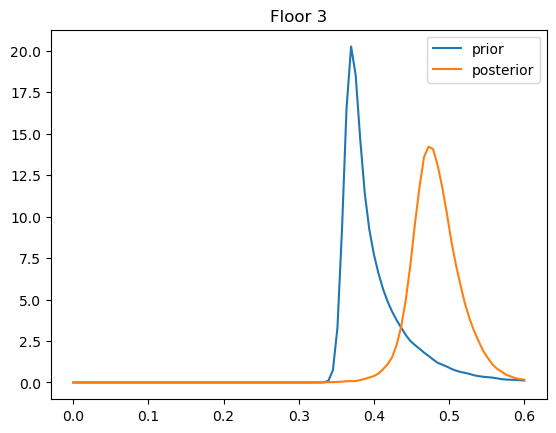

In [1]:
import numpy as np

import matplotlib.pyplot as plt

from scipy.stats import norm

from scipy.special import factorial

from scipy.stats import gaussian_kde

floors = 3

### When changing number of observations, the variance of chaos vector needs manual change
observed = 2

nrv = 2
order = 2
npc = (factorial(nrv+order) / ( factorial(nrv) * factorial(order) )).astype(int)
pccoeff =  int( npc + observed )
## First index is floor number and second is PC coefficient



# First floor
u10 = 0.2 # mean
u11 = 0.04 # xi1 
u12 = 0.01 # xi2
u13 = 0.08 # xi1 ^2 - 1
u14 = 0.01 # xi1* xi2
u15 = 0.03 # xi2 ^2 - 1
u16 = 0
u17 = 0

# Second floor
u20 = 0.3
u21 = 0.02
u22 = 0.02
u23 = 0.02
u24 = 0.01
u25 = 0.04
u26 = 0 
u27 = 0


# Third floor
u30 = 0.4
u31 = 0.03
u32 = 0.02
u33 = 0.01
u34 = 0.02
u35 = 0.01
u36 = 0
u37 = 0



########################################### ###############################
### Sampling for generating the PDF

np.random.seed(31)

nsamp =  100000

xi1 = np.random.normal(0,1, nsamp)
xi2 = np.random.normal(0,1, nsamp)

u1_priorpdf = np.zeros((nsamp,1))
u2_priorpdf = np.zeros((nsamp,1))
u3_priorpdf = np.zeros((nsamp,1))

eta1 = np.random.normal(0,1,nsamp)

eta2 = np.random.normal(0,1,nsamp)

###################################### ##########################

# u1_priorpdf[:,0] = u10 + u11 *  xi1 + u12 *  xi2   + u13 * (xi1 **2 - 1) + u14 * (xi1 * xi2 ) + u15 * (xi2**2 - 1 ) \
#  + u16 * (eta1) + u17 * eta2

# u2_priorpdf[:,0] = u20 + u21 *  xi1 + u22 *  xi2 + u23 * (xi1 **2 - 1) + u24 * (xi1 * xi2 ) + u25 * (xi2**2 - 1 ) \
#  + u26 * (eta1) + u27 * eta2

# u3_priorpdf[:,0] = u30 + u31 *  xi1 + u32 *  xi2 + u33 * (xi1 **2 - 1) + u34 * (xi1 * xi2 ) + u35 * (xi2**2 - 1 ) \
#  + u36 * (eta1) + u37 * eta2


########################################### ###############################

## Creating matrix A_f with all PC coefficient vectors

U0 = np.array([[u10], [u20], [u30]])
U1 = np.array([[u11], [u21], [u31]])
U2 = np.array([[u12], [u22], [u32]])

U3 = np.array([[u13], [u23], [u33]])
U4 = np.array([[u14], [u24], [u34]])
U5 = np.array([[u15], [u25], [u35]])

# U3 = np.array([[u13], [u23], [u33]])

print(U0)

A_f = np.zeros((floors,pccoeff))

A_f[:,0] = U0.reshape(floors)
A_f[:,1] = U1.reshape(floors)
A_f[:,2] = U2.reshape(floors)

A_f[:,3] = U3.reshape(floors)
A_f[:,4] = U4.reshape(floors)
A_f[:,5] = U5.reshape(floors)
# A_f[:,3] = U3.reshape(floors)
print("Forecast PC coefficient matrix is\n", A_f)




u1_priorpdf[:,0] = A_f[0,0] + A_f[0,1] *  xi1 + A_f[0,2] *  xi2   + A_f[0,3] * (xi1 **2 - 1) + \
A_f[0,4] * (xi1 * xi2 ) + A_f[0,5] * (xi2**2 - 1 ) +  A_f[0,6] * eta1  + A_f[0,7] * eta2

u2_priorpdf[:,0] = A_f[1,0] + A_f[1,1] *  xi1 + A_f[1,2] *  xi2 +\
     + A_f[1,3] * (xi1 **2 - 1) + A_f[1,4] * (xi1 * xi2 ) + A_f[1,5] * (xi2**2 - 1 ) +  A_f[1,6] * eta1  + A_f[1,7] * eta2

u3_priorpdf[:,0] = A_f[2,0] + A_f[2,1] *  xi1 + A_f[2,2] *  xi2  + A_f[2,3] * (xi1 **2 - 1) + A_f[2,4] * (xi1 * xi2 ) + A_f[2,5] * (xi2**2 - 1 ) \
    +  A_f[2,6] * eta1  + A_f[2,7] * eta2


### Generating the data vector

Hk = np.zeros((observed,floors))

# Hk = np.zeros((observed,pccoeff))

if(observed == 1): 
    Hk[0,0] = 1
elif (observed == 2):
    Hk[0,0] = 1
    Hk[1,1] = 1
else:
    Hk[0,0] = 1
    Hk[1,1] = 1
    Hk[2,2] = 1

# Hk[2,2] = 1

# for i in range(pccoeff):
#     Hk[:,i] = h_k

## PC coefficients of data

print("Hk matrix is\n", Hk)

dk = np.zeros((observed,pccoeff))

# noise = np.eye(observed)
Gamma = np.eye(observed)
noisevar = 1e-4

np.random.seed(106)

nsteps = 1

epsilon = np.random.normal(0,1,size=(observed,nsteps))

print("epsilon is", epsilon)

# noise = noise + epsilon

# Gamma = noise * noisevar

Gamma[0,0] = 0.25
Gamma[1,1] = 0.001

H_knoise = np.eye((observed))


# Generating the sample value of state
# xi1 = np.random.normal(0,1, 1)
# xi2 = np.random.normal(0,1, 1)

# sample1 = A_f[0,0] + A_f[0,1] *  xi1 + A_f[0,2] *  xi2   + A_f[0,3] * (xi1 **2 - 1) + \
# A_f[0,4] * (xi1 * xi2 ) + A_f[0,5] * (xi2**2 - 1 ) 

# sample2 = A_f[1,0] + A_f[1,1] *  xi1 + A_f[1,2] *  xi2   + A_f[1,3] * (xi1 **2 - 1) + \
# A_f[1,4] * (xi1 * xi2 ) + A_f[1,5] * (xi2**2 - 1 ) 

# sample3 = A_f[2,0] + A_f[2,1] *  xi1 + A_f[2,2] *  xi2   + A_f[2,3] * (xi1 **2 - 1) + \
# A_f[2,4] * (xi1 * xi2 ) + A_f[2,5] * (xi2**2 - 1 ) 

# sample = np.array((sample1, sample2, sample3))


### Taking the same sample as EnKF 
sample = np.loadtxt('./../EnKF/sample.txt')

print("sample is",sample)

sample = sample.reshape(floors,1)

# print(noise)
# d0 = Hk @ sample + np.sqrt(noisevar) * epsilon

d0 = np.array([[0.8], [0.5]])

dk[:,0] = d0.reshape(observed)


for i in range(observed):
    dnoise =  H_knoise @ np.sqrt(Gamma[i,:])
    # print(dnoise)
    # dnoise = dnoise.reshape(observed,1) @ epsilon[i,:].reshape(1,1)
    # dk[:,pccoeff-observed+i] = dnoise.reshape(observed)
    dk[:,pccoeff-observed+i] = dnoise.reshape(observed)
# d1 = np.zeros(floors,1)
# d1 = np.zeros(floors,1)

print("data matrix is\n", dk)


### Constructing covariance matrix

varpc = [1, 1, 1, 2, 1, 2, 1,1]

P_k = np.zeros((floors,floors))

P_u = np.zeros((floors,floors))

for i in range(1,pccoeff):
    P_k = P_k + varpc[i] * (A_f[:,i].reshape(floors,1) @  (A_f[:,i].reshape(floors,1)).T)


print("forecast covariance is\n", P_k)

print("Noise covariance is\n", Gamma)



K_g = P_k @ Hk.T @ np.linalg.inv(Hk @ P_k @ Hk.T + Gamma)


print("Kalman gain is\n", K_g)


### Update state

# u_a = np.zeros((floors,pccoeff))

A_u = A_f + K_g @ (dk - Hk @ A_f)

# for i in range(pccoeff):
#     u_a[:,i] = A_f[:,i] + K_g @ (dk[:,i].reshape(observed,1) - Hk @ A_f[:,i].reshape(floors,1))

print("updated state is\n", A_u)


for i in range(1,pccoeff):
    P_u = P_u + varpc[i] * (A_u[:,i].reshape(floors,1) @  (A_u[:,i].reshape(floors,1)).T)


print("updated covarince is\n", P_u)


x1 =  np.linspace(-0.25,1.2, 100)

x2 =  np.linspace(0.0,0.6, 100)

x3 =  np.linspace(0.0,0.6, 100)


kde = gaussian_kde(u1_priorpdf[:,0], bw_method='scott')

kde_floor1 = kde(x1)

kde = gaussian_kde(u2_priorpdf[:,0], bw_method='scott')

kde_floor2 = kde(x2)

kde = gaussian_kde(u3_priorpdf[:,0], bw_method='scott')

kde_floor3 = kde(x3)



xi1 = np.random.normal(0,1, nsamp)
xi2 = np.random.normal(0,1, nsamp)


eta1 = np.random.normal(0,1,nsamp)

eta2 = np.random.normal(0,1,nsamp)

u1_updatepdf = np.zeros((nsamp,1))
u2_updatepdf = np.zeros((nsamp,1))
u3_updatepdf = np.zeros((nsamp,1))

u1_updatepdf[:,0] = A_u[0,0] + A_u[0,1] *  xi1 + A_u[0,2] *  xi2   + A_u[0,3] * (xi1 **2 - 1) + \
A_u[0,4] * (xi1 * xi2 ) + A_u[0,5] * (xi2**2 - 1 ) +  A_u[0,6] * eta1  + A_u[0,7] * eta2

u2_updatepdf[:,0] = A_u[1,0] + A_u[1,1] *  xi1 + A_u[1,2] *  xi2 +\
     + A_u[1,3] * (xi1 **2 - 1) + A_u[1,4] * (xi1 * xi2 ) + A_u[1,5] * (xi2**2 - 1 ) +  A_u[1,6] * eta1  + A_u[1,7] * eta2

u3_updatepdf[:,0] = A_u[2,0] + A_u[2,1] *  xi1 + A_u[2,2] *  xi2  + A_u[2,3] * (xi1 **2 - 1) + A_u[2,4] * (xi1 * xi2 ) + A_u[2,5] * (xi2**2 - 1 ) \
    +  A_u[2,6] * eta1  + A_u[2,7] * eta2




kde = gaussian_kde(u1_updatepdf[:,0], bw_method='scott')

kde_updatefloor1 = kde(x1)

kde = gaussian_kde(u2_updatepdf[:,0], bw_method='scott')

kde_updatefloor2 = kde(x2)

kde = gaussian_kde(u3_updatepdf[:,0], bw_method='scott')

kde_updatefloor3 = kde(x3)



plt.figure(i)
plt.title("Floor 1")
plt.plot(x1,kde_floor1,label = 'prior')
plt.plot(x1,kde_updatefloor1,label = 'posterior')
plt.axvline(dk[0,0], color='red', linestyle='--', label='data point- floor 1')
plt.legend()
plt.savefig('PCKF_floor3_1observed.pdf')
plt.show()

plt.figure(i+1)
plt.title("Floor 2")
plt.plot(x2,kde_floor2,label = 'prior')
plt.plot(x2,kde_updatefloor2,label = 'posterior')
plt.axvline(dk[1,0], color='red', linestyle='--', label='data point- floor 2')
plt.legend()
plt.savefig('PCKF_floor3_1observed.pdf')
plt.show()

plt.figure(i+2)
plt.title("Floor 3")
plt.plot(x3,kde_floor3,label = 'prior')
plt.plot(x3,kde_updatefloor3,label = 'posterior')
# plt.axvline(d_k[2], color='red', linestyle='--', label='x = 5')
plt.legend()
plt.savefig('PCKF_floor3_1observed.pdf')
plt.show()





NpzFile './../EnKF/enkf_update_2data_nonlinear.npz' with keys: x, y, z


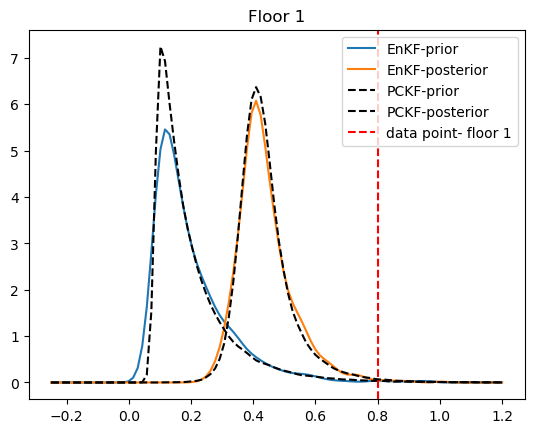

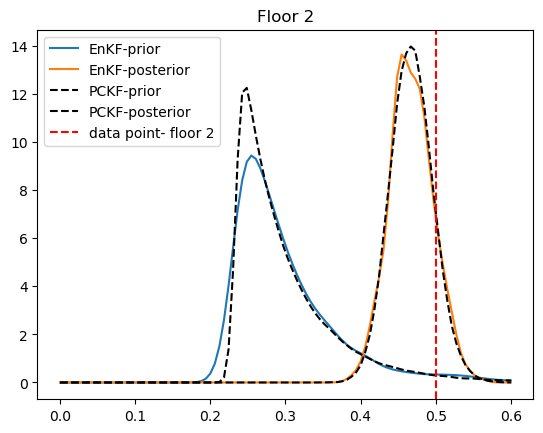

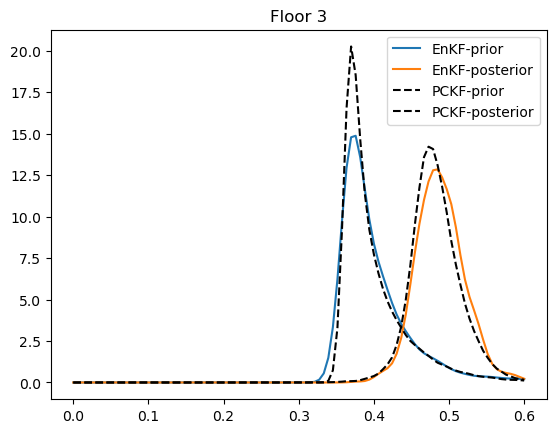

In [2]:



### File containing 1 Kalman filter update with 2 floor measurements 

if(observed == 1):
    npzfile_prior = np.load('./../EnKF/enkf_prior_1data_nonlinear.npz')
    npzfile_posterior = np.load('./../EnKF/enkf_update_1data_nonlinear.npz')
else:
    npzfile_prior = np.load('./../EnKF/enkf_prior_2data_nonlinear.npz')
    npzfile_posterior = np.load('./../EnKF/enkf_update_2data_nonlinear.npz')


print(npzfile_posterior)


plt.figure(1)
plt.title("Floor 1")
plt.plot(x1,npzfile_prior['x'],label = 'EnKF-prior')
plt.plot(x1,npzfile_posterior['x'],label = 'EnKF-posterior')
plt.plot(x1,kde_floor1,'k--',label = 'PCKF-prior')
plt.plot(x1,kde_updatefloor1,'k--',label = 'PCKF-posterior')
plt.axvline(dk[0,0], color='red', linestyle='--', label='data point- floor 1')
plt.legend()
plt.savefig('PCKF_floor1_2data_nonlinear.pdf')
plt.show()

plt.figure(2)
plt.title("Floor 2")
plt.plot(x2,npzfile_prior['y'],label = 'EnKF-prior')
plt.plot(x2,npzfile_posterior['y'],label = 'EnKF-posterior')
plt.plot(x2,kde_floor2,'k--',label = 'PCKF-prior')
plt.plot(x2,kde_updatefloor2,'k--',label = 'PCKF-posterior')
plt.axvline(dk[1,0], color='red', linestyle='--', label='data point- floor 2')
plt.legend()
plt.savefig('PCKF_floor2_2data_nonlinear.pdf')
plt.show()

plt.figure(3)
plt.title("Floor 3")
plt.plot(x3,npzfile_prior['z'],label = 'EnKF-prior')
plt.plot(x3,npzfile_posterior['z'],label = 'EnKF-posterior')
plt.plot(x3,kde_floor3,'k--',label = 'PCKF-prior')
plt.plot(x3,kde_updatefloor3,'k--',label = 'PCKF-posterior')
plt.legend()
plt.savefig('PCKF_floor3_2data_nonlinear.pdf')
plt.show()
